In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Read in AFL / CIO data (2700 records)

salary = "ceo_salary_aflcio.csv"
salary_df = pd.read_csv(salary, encoding="utf-8")
salary_df.head()

,Symbol,Name,CEO,Year,Salary
0,TSLA,"Tesla, Inc.",Elon Musk,2018,2284044884
1,AAXN,"Axon Enterprise, Inc.",Patrick Smith,2018,246026710
2,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005
3,ORCL,Oracle Corp.,Mark Hurd,2018,108295023
4,OMF,"OneMain Holdings, Inc.",Jay Levine,2018,71532583


In [3]:
#Import Company data

consfin_csv = "company_data.csv"
com_df = pd.read_csv(consfin_csv)
com_df.head()

,Symbol,Company,Sector,Price,PE_Ratio,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
#Merge two dataframes on Ticker symbol

salary_co = pd.merge(salary_df, com_df, on="Symbol")
salary_co.head()

,Symbol,Name,CEO,Year,Salary,Company,Sector,Price,PE_Ratio,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005,Discovery Communications-A,Consumer Discretionary,22.87,11.00,0.000000,1.96,30.250,15.99,8.763757e+09,2.100000e+09,1.804088,1.50,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ORCL,Oracle Corp.,Mark Hurd,2018,108295023,Oracle Corp.,Information Technology,46.84,18.81,1.555146,2.20,53.140,40.01,2.020000e+11,1.654500e+10,5.256165,3.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,DIS,The Walt Disney Co.,Robert Iger,2018,65645214,The Walt Disney Company,Consumer Discretionary,101.35,17.78,1.603665,5.70,116.100,96.20,1.580000e+11,1.254400e+10,3.963556,3.82,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,FOXA,"Twenty-First Century Fox, Inc.",James Murdoch,2018,50263861,Twenty-First Century Fox Class A,Consumer Discretionary,34.56,17.81,0.998336,1.59,39.135,24.81,4.402709e+10,5.280000e+09,2.108032,4.11,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,EL,"The Estee Lauder Companies, Inc.",Fabrizio Freda,2018,48753819,Estee Lauder Cos.,Consumer Staples,131.46,37.78,1.128350,3.35,138.740,81.69,4.954326e+10,2.478000e+09,3.952258,10.82,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [54]:
sector_ceo_b = salary_co[["Symbol", "Company", "Sector", "PE_Ratio", "CEO", 'Salary', 'Market Cap']]
sector_ceo_b.head()                   

,Symbol,Company,Sector,PE_Ratio,CEO,Salary,Market Cap
0,DISCA,Discovery Communications-A,Consumer Discretionary,11.00,David Zaslav,129499005,8.763757e+09
1,ORCL,Oracle Corp.,Information Technology,18.81,Mark Hurd,108295023,2.020000e+11
2,DIS,The Walt Disney Company,Consumer Discretionary,17.78,Robert Iger,65645214,1.580000e+11
3,FOXA,Twenty-First Century Fox Class A,Consumer Discretionary,17.81,James Murdoch,50263861,4.402709e+10
4,EL,Estee Lauder Cos.,Consumer Staples,37.78,Fabrizio Freda,48753819,4.954326e+10


In [28]:
sector_ceo_b.shape

(459, 7)

In [29]:
sector_ceo = sector_ceo_b.dropna(how = 'any')

In [30]:
sector_ceo.shape

(457, 7)

In [31]:
#Calculate average Fortune 500 salary is $14.1mil
avg_salary = sector_ceo["Salary"].mean()
avg_salary

14182822.72428884

In [32]:
#Calculate average PE Ratio
avg_peratio = sector_ceo["PE_Ratio"].mean()
avg_peratio

25.42842450765865

In [11]:
#Analysis by Sector

grouped_sector = sector_ceo.groupby("Sector")
grouped_sector

In [12]:
#A list of sectors and number of companies in each sector (total number 426)

total_companies = grouped_sector["Sector"].value_counts()
total_companies

Sector                      Sector                    
Consumer Discretionary      Consumer Discretionary        73
Consumer Staples            Consumer Staples              31
Energy                      Energy                        29
Financials                  Financials                    66
Health Care                 Health Care                   57
Industrials                 Industrials                   66
Information Technology      Information Technology        66
Materials                   Materials                     22
Real Estate                 Real Estate                   17
Telecommunication Services  Telecommunication Services     3
Utilities                   Utilities                     27
Name: Sector, dtype: int64

In [13]:
#Average Salary by Sector per million

avr_sal_sector = grouped_sector["Salary"].mean()/1000000
avr_sal_sector

Sector
Consumer Discretionary        15.070156
Consumer Staples              13.313947
Energy                        14.480887
Financials                    13.142770
Health Care                   15.656868
Industrials                   13.057138
Information Technology        16.758616
Materials                     12.245538
Real Estate                   10.035250
Telecommunication Services    28.993283
Utilities                     10.891315
Name: Salary, dtype: float64

In [14]:
#Average PE Ratio by Sector

avr_per_sector = grouped_sector["PE_Ratio"].mean()
avr_per_sector

Sector
Consumer Discretionary        25.961918
Consumer Staples              21.388065
Energy                        40.800690
Financials                    17.788939
Health Care                   23.974211
Industrials                   21.482273
Information Technology        38.120455
Materials                     18.998636
Real Estate                   28.850000
Telecommunication Services    11.190000
Utilities                     17.146296
Name: PE_Ratio, dtype: float64

In [15]:
#Average Market Capitalization by Sector - per billion (100 million)

avr_mktcap_sector = grouped_sector["Market Cap"].mean()/1000000000
avr_mktcap_sector

Sector
Consumer Discretionary         39.613305
Consumer Staples               63.577936
Energy                         45.573503
Financials                     51.853329
Health Care                    54.845049
Industrials                    36.203527
Information Technology         90.061559
Materials                      19.594157
Real Estate                    21.246479
Telecommunication Services    151.079066
Utilities                      22.459377
Name: Market Cap, dtype: float64

In [16]:
sector_ceo.to_csv("fileOne.csv", index=False, header=True)

In [17]:
#Variables for scattergram

#Get range for salary - minumim
sector_ceo.Salary.min()

1

In [18]:
#Get range for salary - maximum
sector_ceo.Salary.max()

129499005

In [19]:
#Get range for pe ratio - miniumum
sector_ceo.PE_Ratio.min()

-251.53

In [20]:
#Get range for pe ratio - maximum
sector_ceo.PE_Ratio.max()

520.15

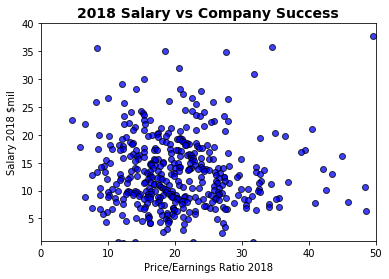

In [65]:
# Scatterplot of CEO Salary and success measured by PE Ratios

x_value = sector_ceo["PE_Ratio"]
y_axis = sector_ceo["Salary"]/1000000
x_limit = 50 #Max was 250, mean was 25, took out outliers

plt.ylim(1, 40) #Max is 130mil, took to down to 30 mil
plt.xlim(0, x_limit) #Min is -255

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("2018 Salary vs Company Success", fontsize=14, fontweight="bold")
plt.xlabel("Price/Earnings Ratio 2018")
plt.ylabel("Salary 2018 $mil")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("scatter_salary_per.png")

# Show plot
plt.show()

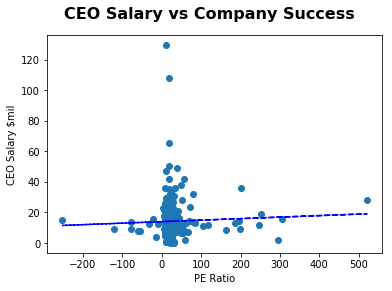

In [63]:
#Regression of salary on PE Ratio
# Set data
x_axis = sector_ceo["PE_Ratio"]
y_axis = sector_ceo["Salary"]/1000000

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("CEO Salary vs Company Success", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 50)
#ax.set_ylim(0, 50)

ax.set_xlabel("PE Ratio")
ax.set_ylabel("CEO Salary $mil")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("ceo_per_regression.png")

plt.show()

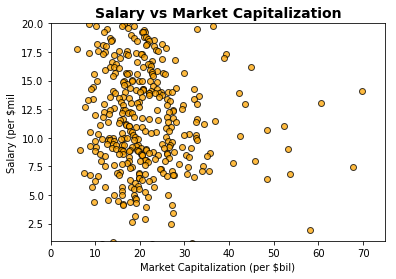

In [69]:
# Scatterplot of CEO Salary and Market Capitalization

y_axis = sector_ceo['Salary']/1000000
x_axis = sector_ceo['Market Cap']/100000000

x_limit = 75
plt.ylim(1, 20)
plt.xlim(0, x_limit)

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Salary vs Market Capitalization", fontsize=14, fontweight="bold")
plt.xlabel("Market Capitalization (per $bil)")
plt.ylabel("Salary (per $mil")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("salary_mktcap_scatter.png")

# Show plot
plt.show()

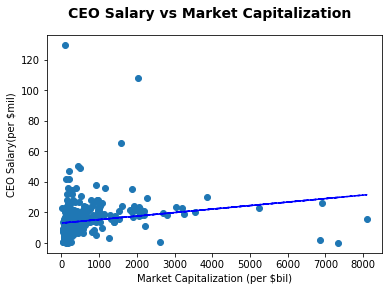

In [66]:
#Regression Analysis of CEO Salary to market capitalization

y_axis = salary_co['Salary']/1000000
x_axis = salary_co['Market Cap']/100000000

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()
fig.suptitle("CEO Salary vs Market Capitalization", fontsize=14, fontweight="bold")
ax.set_xlabel("Market Capitalization (per $bil)")
ax.set_ylabel("CEO Salary(per $mil)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("salary_mktcap_avg.png")
plt.show()                       

In [59]:
# Calculate Independent (Two Sample) T-Test

pop1 = sector_ceo['Salary']
pop2 = sector_ceo['PE_Ratio']

stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=28.96157464306072, pvalue=2.137127720615758e-105)

In [57]:
# Calculate Independent (Two Sample) T-Test

population1 = sector_ceo['Salary']
population2 = sector_ceo['Market Cap']
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-12.134002625374341, pvalue=1.4749765983869707e-29)

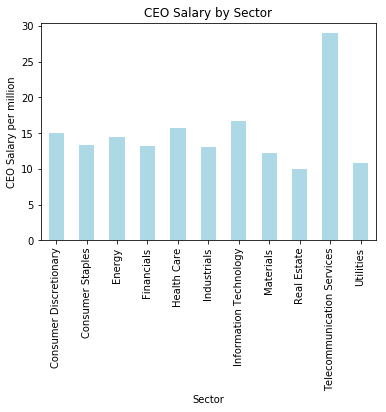

In [39]:
# bar chart

avr_sal_sector.plot(kind="bar", color = "lightblue", )
plt.title("CEO Salary by Sector")
plt.ylabel("CEO Salary per million")

plt.savefig("sector_salary_bar.png")

plt.show()

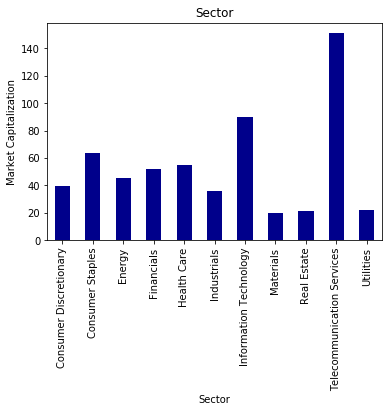

In [40]:
# bar chart

avr_mktcap_sector.plot(kind="bar", color = "darkblue", )
plt.title("Sector")
plt.ylabel("Market Capitalization")
plt.savefig("sector_mktcap_bar.png")

plt.show()

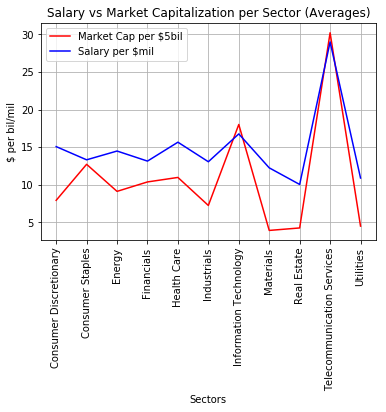

In [41]:
#Compare Sectors - Average salary and market capitalization

market_cap = avr_mktcap_sector/5
salary = avr_sal_sector

market_cap, = plt.plot(market_cap, color="red", label="Market Cap per $5bil")
salary, = plt.plot(salary, color="blue", label="Salary per $mil")

plt.legend(handles=[market_cap, salary], loc="best")
plt.grid()
plt.title("Salary vs Market Capitalization per Sector (Averages)")
plt.xlabel("Sectors")
plt.ylabel("$ per bil/mil")
plt.xticks(rotation='vertical')
plt.savefig("sector_lines.png")
plt.show()

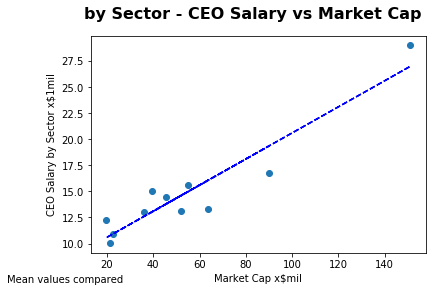

In [45]:
#Regression Plot by Sector of PE Ratio/CEO Salary

# Set data
x_axis = avr_mktcap_sector
y_axis = avr_sal_sector

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()
fig.suptitle("by Sector - CEO Salary vs Market Cap", fontsize=16, fontweight="bold")
plt.text(2, 7, 'Mean values compared',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

ax.set_xlabel("Market Cap x$mil")
ax.set_ylabel("CEO Salary by Sector x$1mil")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("sector_mktcap_f.png")

plt.show()